In [7]:
#importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
import scipy.stats as stats

import itertools
import requests
from io import StringIO
import calendar

In [2]:
# importing dataset
data = pd.read_csv('Tractor-Sales.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month-Year                144 non-null object
Number of Tractor Sold    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [4]:
data.head()
# data is not time indexed

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [8]:
dates = pd.date_range(start='2003-01-01',freq='MS',periods=data.shape[0])
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [9]:
dates.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', length=144)

In [10]:
dates.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', length=144)

In [11]:
data['month'] = dates.month
data['month'] = data.month.apply(lambda x: calendar.month_abbr[x])
data['year'] = dates.year

In [12]:
data.head()

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [13]:
data.drop(columns=['Month-Year'],inplace=True)
data.rename(columns={'Number of Tractor Sold':'Tractor_sales'},inplace=True)

In [14]:
data.head()

,Tractor_sales,month,year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [15]:
# transform data into time series data by using time indexing,so that it can be treated as a time-series dataframe
data.set_index(dates,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Freq: MS
Data columns (total 3 columns):
Tractor_sales    144 non-null int64
month            144 non-null object
year             144 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.5+ KB


In [16]:
data.head()

,Tractor_sales,month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


# Sales Time Series

In [17]:
sales_ts = data.Tractor_sales
sales_ts

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
2003-06-01    189
2003-07-01    207
2003-08-01    207
2003-09-01    171
2003-10-01    150
2003-11-01    138
2003-12-01    165
2004-01-01    145
2004-02-01    168
2004-03-01    197
2004-04-01    208
2004-05-01    210
2004-06-01    209
2004-07-01    238
2004-08-01    238
2004-09-01    199
2004-10-01    168
2004-11-01    152
2004-12-01    196
2005-01-01    183
2005-02-01    200
2005-03-01    249
2005-04-01    251
2005-05-01    289
2005-06-01    249
             ... 
2012-07-01    687
2012-08-01    707
2012-09-01    509
2012-10-01    452
2012-11-01    412
2012-12-01    472
2013-01-01    454
2013-02-01    455
2013-03-01    568
2013-04-01    610
2013-05-01    706
2013-06-01    661
2013-07-01    767
2013-08-01    783
2013-09-01    583
2013-10-01    513
2013-11-01    481
2013-12-01    567
2014-01-01    525
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
2014-07-01

In [18]:
plt.style.use('bmh')

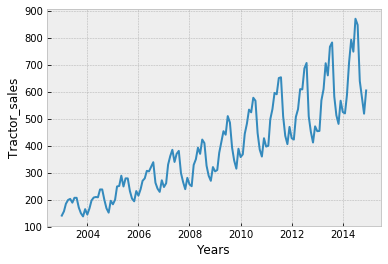

<Figure size 1008x576 with 0 Axes>

In [21]:
# plotting the series
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor_sales')
plt.figure(figsize=(14,8))
plt.show()

In [ ]:
# here we can observe that time series is not stationary(not constant mean and variance throughout series)
# increaing/decreasing mean throughout series give rise to trends

In [22]:
# use dicky-fuller test to verify that time series is not stationary statistically
from statsmodels.tsa.stattools import adfuller
dft_res = adfuller(sales_ts)
for key,value in dft_res[4].items():
    print('Critical Value',key,'is',value)
result= pd.Series(dft_res[0:4],index=['Test Statistic', 'p-value', 'lags Used', 'Number of Observations Used'])
print(result)

Critical Value 1% is -3.482087964046026
Critical Value 5% is -2.8842185101614626
Critical Value 10% is -2.578864381347275
Test Statistic                   1.108825
p-value                          0.995291
lags Used                       14.000000
Number of Observations Used    129.000000
dtype: float64


In [ ]:
# p value > 0.05, fails to reject null hypothesis, so time series is not stationary

# Identifying Series Components(series decomposition)

In [ ]:
# 1. Trends
# can be identified through series plotting but for better visualization of trends use moving average

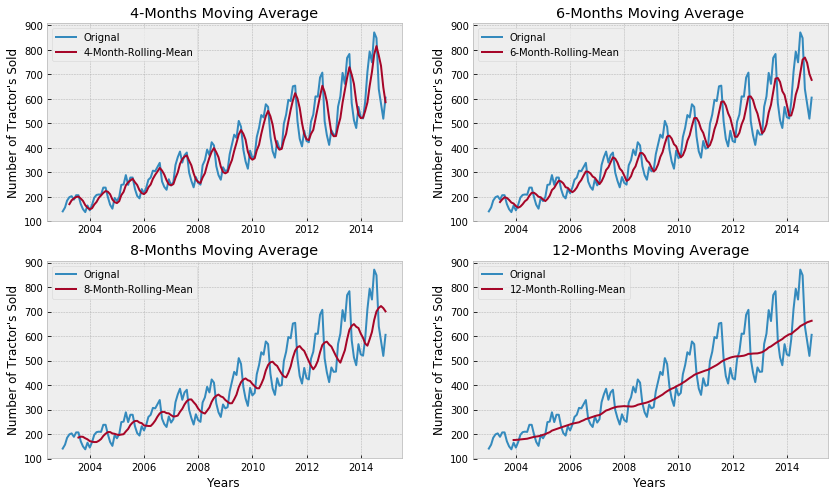

In [23]:
fig,axes= plt.subplots(2,2,sharex=False,sharey=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales_ts.index,sales_ts,label='Orignal')
axes[0][0].plot(sales_ts.index,sales_ts.rolling(window=4).mean(),label='4-Month-Rolling-Mean')
axes[0][0].set_xlabel("")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales_ts.index,sales_ts,label='Orignal')
axes[0][1].plot(sales_ts.index,sales_ts.rolling(window=6).mean(),label='6-Month-Rolling-Mean')
axes[0][1].set_xlabel("")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales_ts.index,sales_ts,label='Orignal')
axes[1][0].plot(sales_ts.index,sales_ts.rolling(window=8).mean(),label='8-Month-Rolling-Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales_ts.index,sales_ts,label='Orignal')
axes[1][1].plot(sales_ts.index,sales_ts.rolling(window=12).mean(),label='12-Month-Rolling-Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

In [ ]:
# Positive trend can be observed 

In [24]:
#2. Seasonality

In [25]:
monthly_sales =pd.pivot_table(data,columns='year',index='month',values='Tractor_sales').reindex(index=['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


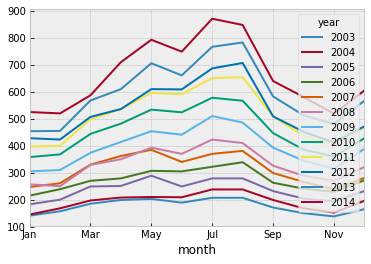

In [27]:
monthly_sales.plot()
plt.show()
#We can see a seasonal cycle of 12 months where the value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year. 
#We can see a seasonal effect with a cycle of 12 months.
#July and August are the peak months for tractor sales 

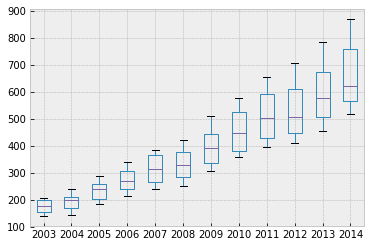

In [29]:
monthly_sales.boxplot()
plt.show()
# mean and variance consistently changing(increasing) because of non-stationary time series
# overall sales is increasing every year

In [30]:
yearly_sales = monthly_sales.T
yearly_sales

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


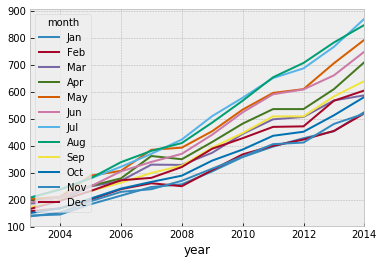

In [32]:
yearly_sales.plot()
plt.show()
# each month sale is increasing every year

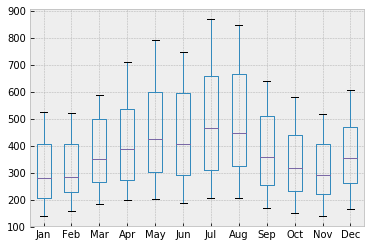

In [34]:
yearly_sales.boxplot()
plt.show()
#the variance and the mean value in July and August are also much higher than any of the other months.

In [45]:
# 3. Residuals
decomposition = sm.tsa.seasonal_decompose(sales_ts,model='multiplicative')

In [46]:
decomposition.resid

2003-01-01         NaN
2003-02-01         NaN
2003-03-01         NaN
2003-04-01         NaN
2003-05-01         NaN
2003-06-01         NaN
2003-07-01    0.950648
2003-08-01    0.951822
2003-09-01    1.000064
2003-10-01    1.003991
2003-11-01    1.005438
2003-12-01    1.012668
2004-01-01    0.964784
2004-02-01    1.075410
2004-03-01    1.037367
2004-04-01    1.015796
2004-05-01    0.928017
2004-06-01    0.967551
2004-07-01    0.984506
2004-08-01    0.974684
2004-09-01    1.024101
2004-10-01    0.975238
2004-11-01    0.940831
2004-12-01    1.004759
2005-01-01    1.013184
2005-02-01    1.063802
2005-03-01    1.088910
2005-04-01    1.015465
2005-05-01    1.050512
2005-06-01    0.944274
                ...   
2012-07-01    1.047883
2012-08-01    1.078637
2012-09-01    0.985872
2012-10-01    0.996444
2012-11-01    0.979561
2012-12-01    0.940703
2013-01-01    0.982772
2013-02-01    0.949974
2013-03-01    0.977740
2013-04-01    0.974227
2013-05-01    1.017965
2013-06-01    0.996603
2013-07-01 

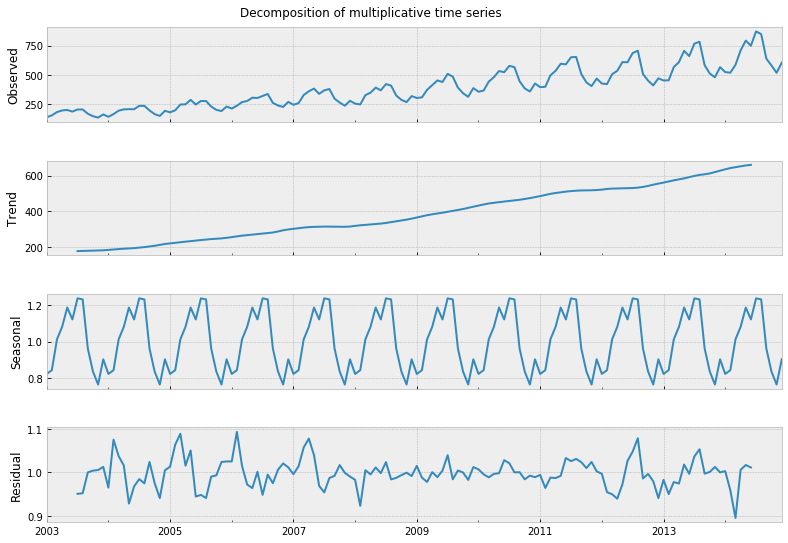

In [47]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [48]:
# Yt = f(trend,seasonality,irregularity(residuals))
# cyclicity is not considered here as business cycles in traditional businesses are observed over a period of 7 or more years
# and we have only 14 years observations so no cyclicity

# Making Time Series Stationary

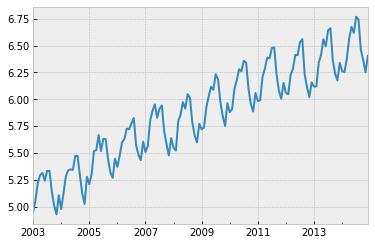

In [51]:
# So, first apply log tranformation for contant variance
np.log(sales_ts).plot() 
plt.show()

In [52]:
log_sales_ts = np.log(sales_ts) 
log_sales_ts.dropna(inplace=True)

In [ ]:
# now use differencing for constant mean or detrending

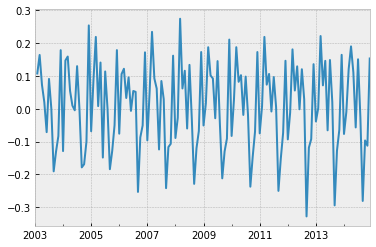

In [54]:
log_sales_ts.diff(periods=1).plot()
plt.show()
# slightly constant mean

In [55]:
log_sales_ts_diff1 = log_sales_ts.diff(periods=1)
log_sales_ts_diff1.dropna(inplace=True)
log_sales_ts_diff2 = log_sales_ts_diff1.diff(periods=1)
log_sales_ts_diff2.dropna(inplace=True)

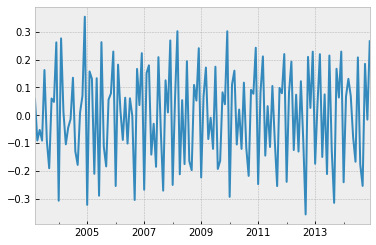

In [56]:
log_sales_ts_diff2.plot()
plt.show()

In [57]:
#now use dicky-fuller test to check whether time series become stationary after above transformations
from statsmodels.tsa.stattools import adfuller
dft_res = adfuller(log_sales_ts_diff2)
for key,value in dft_res[4].items():
    print('Critical Value',key,'is',value)
result= pd.Series(dft_res[0:4],index=['Test Statistic', 'p-value', 'lags Used', 'Number of Observations Used'])
print(result)

Critical Value 1% is -3.4825006939887997
Critical Value 5% is -2.884397984161377
Critical Value 10% is -2.578960197753906
Test Statistic                -8.284689e+00
p-value                        4.423135e-13
lags Used                      1.300000e+01
Number of Observations Used    1.280000e+02
dtype: float64


In [58]:
# p-value < 0.05, hence, time series became stationary

In [59]:
# So we got sationary time series which is seasonal and univariate, so we now apply SARIMA model for forecasting 

# Building Forecasting Model 

In [ ]:
#Plot ACF and PACF to identify potential AR(p) and MA(q) model components, d =2(from above results)

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


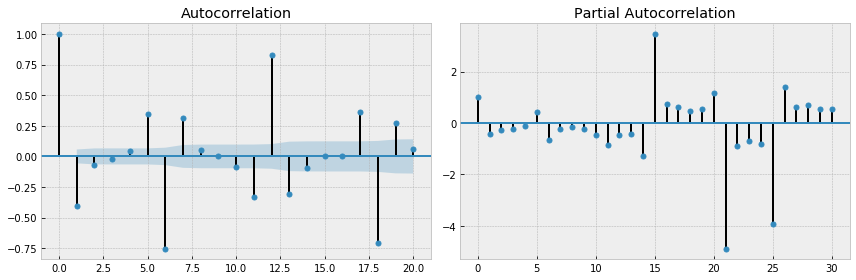

In [60]:
fig,axes = plt.subplots(1,2,sharex=False,sharey=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(log_sales_ts_diff2,lags=20,ax=axes[0],alpha=0.5)
smt.graphics.plot_pacf(log_sales_ts_diff2,lags=30,ax=axes[1],alpha=0.5)
plt.tight_layout()
# p is identified through PACF plot(p=1 as after first spike second spike is negative)
# q is identified through ACF plot(q=1 as after first spike second spike is negative)

In [61]:
# first build arima model
model = sm.tsa.statespace.SARIMAX(log_sales_ts,order=(1,2,1),enforce_invertibility=False,enforce_stationarity=False)
results = model.fit()

In [62]:
results.summary()
# here aic =-164

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:          Tractor_sales   No. Observations:                  144
Model:               SARIMAX(1, 2, 1)   Log Likelihood                  85.301
Date:                Wed, 23 Oct 2019   AIC                           -164.602
Time:                        01:14:30   BIC                           -155.777
Sample:                    01-01-2003   HQIC                          -161.015
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1281      0.118      1.089      0.276      -0.102       0.359
ma.L1         -1.0000    212.556     -0.005      0.996    -417.602     415.602
sigma2         0.0168      3.568      0.005      0.996      -6.977       7.011
===================================================================================
Ljung-Box (Q):                      536.69   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               1.09   Skew:                            -0.14
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
# now use sarima model on random seasonal order =(1,0,1,12(as high auto-correlation after 12 lags)) and compare aic
model = sm.tsa.statespace.SARIMAX(log_sales_ts,order=(1,2,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)
results = model.fit()
results.summary()
# here aic = -459, lesser the aic better the model 
# so we need to use sarima model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                      Tractor_sales   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 234.891
Date:                            Wed, 23 Oct 2019   AIC                           -459.781
Time:                                    01:16:36   BIC                           -445.521
Sample:                                01-01-2003   HQIC                          -453.987
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3579      0.073     -4.906      0.000      -0.501      -0.215
ma.L1         -0.9999     21.173     -0.047      0.962     -42.497      40.498
ar.S.L12       1.0076      0.014     71.386      0.000       0.980       1.035
ma.S.L12      -0.5640      0.101     -5.586      0.000      -0.762      -0.366
sigma2         0.0014      0.029      0.047      0.962      -0.056       0.059
===================================================================================
Ljung-Box (Q):                       40.40   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.45   Prob(JB):                         0.82
Heteroskedasticity (H):               0.55   Skew:                            -0.11
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
# Now split the time-series into train and test time-series for further validation of our model
test_log_sales_ts = log_sales_ts[-10:]
train_log_sales_ts = log_sales_ts[:-10]

# Identifying best sarima model parameters

In [ ]:
# Now we have to find the parameters which gives us min AIC of model
# Akaike Information Criterion (AIC)
# AIC is an effort to balance the model between goodness-of-fit and number of parameters used in the model.

In [66]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [67]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [68]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [69]:
import sys
import warnings
warnings.filterwarnings('ignore') # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            temp_model = sm.tsa.statespace.SARIMAX(endog= train_log_sales_ts,order=param,seasonal_order=seasonal_param,
                               enforce_invertibility=True,enforce_stationarity=True)
            result = temp_model.fit()
            if result.aic < best_aic:
                best_aic = result.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
            
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
            
print('Best SARIMAX{}X{} model with AIC:{}'.format(best_pdq,best_seasonal_pdq,best_aic))

Best SARIMAX(0, 1, 1)X(1, 0, 1, 12) model with AIC:-462.7275904670446


# Building Best SARIMA Model

In [70]:
best_model = sm.tsa.statespace.SARIMAX(endog= train_log_sales_ts,order=(0,1,1),seasonal_order=(1,0,1,12),
                               enforce_invertibility=True,enforce_stationarity=True)
best_result = best_model.fit()

In [71]:
print(best_result.summary().tables[0])
print(best_result.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor_sales   No. Observations:                  134
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 235.364
Date:                            Wed, 23 Oct 2019   AIC                           -462.728
Time:                                    02:24:47   BIC                           -451.166
Sample:                                01-01-2003   HQIC                          -458.029
                                     - 02-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3095      0.074     -4.202      0.000      -0.454      -0.165
ar.S.L12       0.9935      0.006   

In [72]:
pred_train = np.exp(best_result.predict())
actual_train = np.exp(train_log_sales_ts)
pred_test = np.exp(best_result.forecast(steps=10))
actual_test = np.exp(test_log_sales_ts)

# Validating the SARIMA model by calculating metrics

In [73]:
#MSE
print(metrics.mean_squared_error(actual_train,pred_train))
print(metrics.mean_squared_error(actual_test,pred_test))

349.90335810205136
495.03113839407814


In [74]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(actual_train,pred_train)))
print(np.sqrt(metrics.mean_squared_error(actual_test,pred_test)))

18.705703892183564
22.249295233649047


In [75]:
#MAE
from sklearn import metrics
print(metrics.mean_absolute_error(actual_train,pred_train))
print(metrics.mean_absolute_error(actual_test,pred_test))

12.286916813816271
17.745122274143945


In [76]:
#MAPE
print(sum(abs((actual_train-pred_train)/actual_train))/len(actual_train))
print(sum(abs((actual_test-pred_test)/actual_test))/len(actual_test))

0.04349474043978961
0.027055845097322024


# Visualizing actual and predicted values

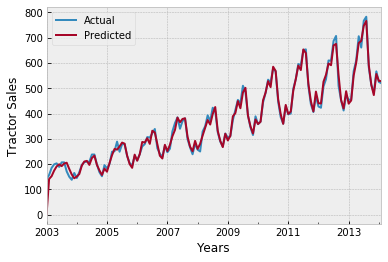

In [77]:
actual_train.plot(label ='Actual')
pred_train.plot(label ='Predicted')
plt.xlabel('Years')
plt.ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
# train data

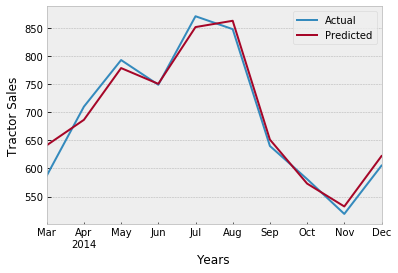

In [78]:
actual_test.plot(label ='Actual')
pred_test.plot(label ='Predicted')
plt.xlabel('Years')
plt.ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
# test data

# Residuals analysis 

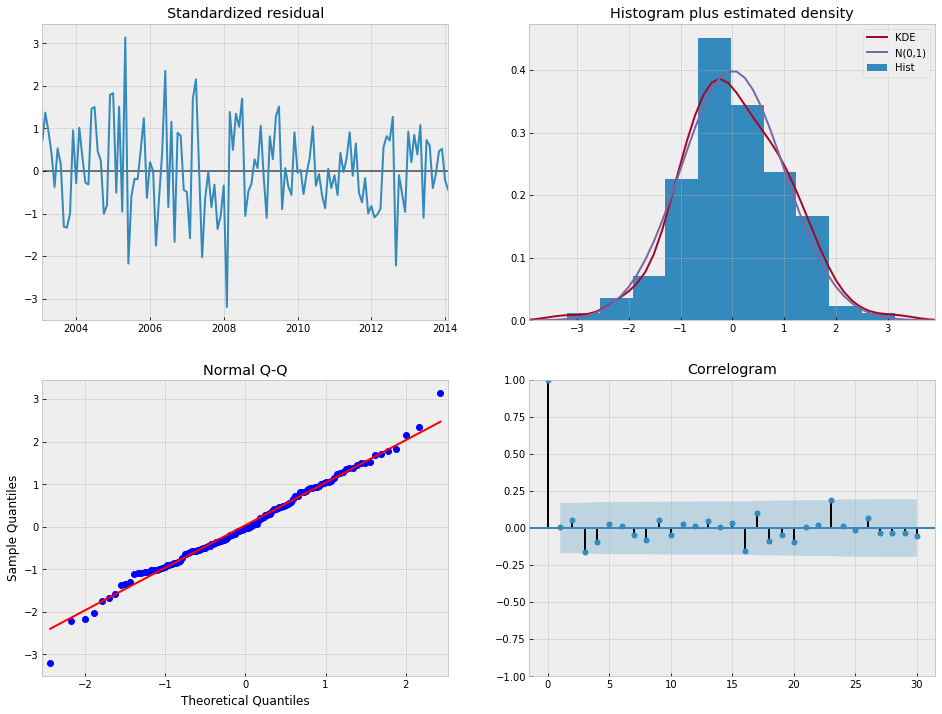

In [80]:
#Diagnostics
#1. Errors follows normality
#2. Errors should not have auto correlation (ACF, no spikes beyond the limits)
#3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)
best_result.plot_diagnostics(lags=30,figsize=(16,12))
plt.show()

In [ ]:
# by observing above metrics, visualizations and residual analysis
# we can say that our model is good fit 

# Forecast for next 3 years 

In [82]:
fc_with_ci =pd.concat([best_result.forecast(steps=36),best_result.get_forecast(steps =36,alpha=0.01).conf_int().rename(columns={'lower Tractor_sales':'lower_ci_99','upper Tractor_sales':'upper_ci_99'}),
 best_result.get_forecast(steps =36,alpha=0.05).conf_int().rename(columns={'lower Tractor_sales':'lower_ci_95','upper Tractor_sales':'upper_ci_95'})],axis=1)         
fc_with_ci = np.exp(fc_with_ci.rename(columns={0:'forecast'}))[10:]
fc_with_ci

,forecast,lower_ci_99,upper_ci_99,lower_ci_95,upper_ci_95
2015-01-01,580.728420,490.565497,687.462735,490.565497,687.462735
2015-02-01,579.544806,486.230726,690.767088,486.230726,690.767088
2015-03-01,711.695897,587.058550,862.794776,587.058550,862.794776
2015-04-01,761.670701,620.670047,934.703163,620.670047,934.703163
2015-05-01,863.216478,695.372911,1071.572787,695.372911,1071.572787
2015-06-01,832.255037,663.149797,1044.482633,663.149797,1044.482633
2015-07-01,943.584215,744.064943,1196.604114,744.064943,1196.604114
2015-08-01,955.937897,746.320066,1224.430782,746.320066,1224.430782
2015-09-01,722.876494,558.975717,934.835648,558.975717,934.835648
2015-10-01,636.463269,487.624534,830.732385,487.624534,830.732385


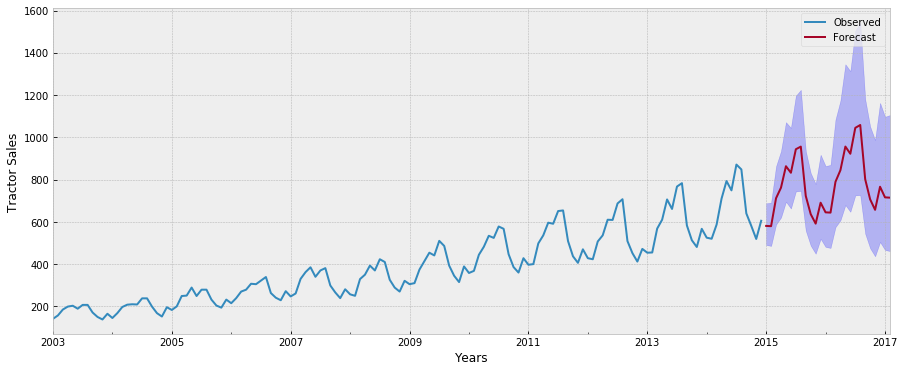

In [85]:
# plotting the forecast with confidence intervals 
obs_plt = sales_ts.plot(label = 'Observed',figsize =(18,6))
fc_with_ci.forecast.plot(label = 'Forecast',figsize =(15,6))
obs_plt.fill_between(fc_with_ci.index,fc_with_ci.lower_ci_95,fc_with_ci.upper_ci_95,color='b',alpha=0.25)
plt.ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

# MULTIVARIATE FOECASTING

In [86]:
mk_data = pd.read_csv('Sales-and-Marketing.csv')
mk_data.head()

,Time Period,Sales,Marketing Expense
0,Jan-11,397,486.64
1,Feb-11,400,501.80
2,Mar-11,498,437.09
3,Apr-11,536,565.16
4,May-11,596,744.15


In [87]:
dates_new = pd.date_range(start='2011-01-01',freq='MS',periods=mk_data.shape[0])
mk_data['month'] = dates_new.month
mk_data['month'] = mk_data.month.apply(lambda x: calendar.month_abbr[x])
mk_data['year'] = dates_new.year

In [88]:
mk_data = mk_data.drop(columns=['Time Period'])
mk_data = mk_data.set_index(dates_new)
mk_data = mk_data.rename(columns={'Sales':'Tractor_Sales','Marketing Expense':'Marketing_Expense'})
mk_data.head()

,Tractor_Sales,Marketing_Expense,month,year
2011-01-01,397,486.64,Jan,2011
2011-02-01,400,501.80,Feb,2011
2011-03-01,498,437.09,Mar,2011
2011-04-01,536,565.16,Apr,2011
2011-05-01,596,744.15,May,2011


In [89]:
mk_ts = mk_data.drop(columns=['month','year'])
mk_ts.head()

,Tractor_Sales,Marketing_Expense
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


# Effect of Marketing Spend of various months on tractor sales

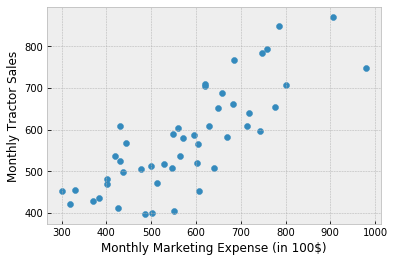

In [90]:
plt.scatter(x=mk_ts.Marketing_Expense,y=mk_ts.Tractor_Sales)
plt.xlabel('Monthly Marketing Expense (in 100$)')
plt.ylabel('Monthly Tractor Sales')
plt.show()

In [91]:
stats.pearsonr(mk_ts.Marketing_Expense,mk_ts.Tractor_Sales)[0]

0.8006794547652779

In [92]:
ms_last_month = mk_ts['Marketing_Expense'].shift(periods=1)
ms_last_month.head()

2011-01-01       NaN
2011-02-01    486.64
2011-03-01    501.80
2011-04-01    437.09
2011-05-01    565.16
Freq: MS, Name: Marketing_Expense, dtype: float64

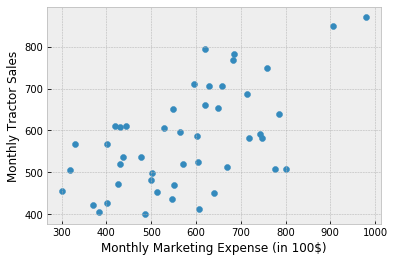

In [93]:
plt.scatter(x=ms_last_month,y=mk_ts.Tractor_Sales)
plt.xlabel('Monthly Marketing Expense (in 100$)')
plt.ylabel('Monthly Tractor Sales')
plt.show()

In [94]:
stats.pearsonr(ms_last_month[1:],mk_ts.Tractor_Sales[1:])[0]

0.592244517767182

In [95]:
ms_last_2_months = mk_ts['Marketing_Expense'].shift(periods=2)
ms_last_2_months.head()

2011-01-01       NaN
2011-02-01       NaN
2011-03-01    486.64
2011-04-01    501.80
2011-05-01    437.09
Freq: MS, Name: Marketing_Expense, dtype: float64

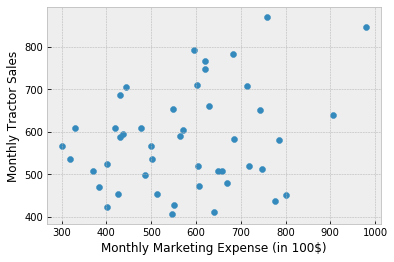

In [96]:
plt.scatter(x=ms_last_2_months,y=mk_ts.Tractor_Sales)
plt.xlabel('Monthly Marketing Expense (in 100$)')
plt.ylabel('Monthly Tractor Sales')
plt.show()

In [97]:
stats.pearsonr(ms_last_2_months[2:],mk_ts.Tractor_Sales[2:])[0]

0.27218795092300674

In [98]:
ms_last_3_months = mk_ts['Marketing_Expense'].shift(periods=3)
ms_last_3_months.head()

2011-01-01       NaN
2011-02-01       NaN
2011-03-01       NaN
2011-04-01    486.64
2011-05-01    501.80
Freq: MS, Name: Marketing_Expense, dtype: float64

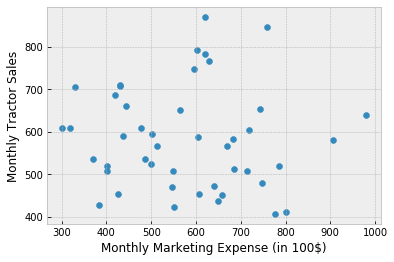

In [99]:
plt.scatter(x=ms_last_3_months,y=mk_ts.Tractor_Sales)
plt.xlabel('Monthly Marketing Expense (in 100$)')
plt.ylabel('Monthly Tractor Sales')
plt.show()

In [100]:
stats.pearsonr(ms_last_3_months[3:],mk_ts.Tractor_Sales[3:])[0]

-0.05120205630486374

In [ ]:
# it can be observed that tractor_sales is highly influenced by marketing_spend of current month,
# moderately by ms_last_months,i.e, moderately influenced by marketing_spend of last month
# weakly by ms_last_2_months
# nearly not by ms_last_3_months

In [103]:
mk_ts = pd.concat([mk_ts,ms_last_month,ms_last_2_months],axis=1)
mk_ts.head()

,Tractor_Sales,Marketing_Expense,Marketing_Expense,Marketing_Expense
2011-01-01,397,486.64,NaN,NaN
2011-02-01,400,501.80,486.64,NaN
2011-03-01,498,437.09,501.80,486.64
2011-04-01,536,565.16,437.09,501.80
2011-05-01,596,744.15,565.16,437.09


In [104]:
mk_ts.columns = ['Tractor_sales','Marketing_spend','Lag_1_ms','Lag_2_ms']
mk_ts.head()

,Tractor_sales,Marketing_spend,Lag_1_ms,Lag_2_ms
2011-01-01,397,486.64,NaN,NaN
2011-02-01,400,501.80,486.64,NaN
2011-03-01,498,437.09,501.80,486.64
2011-04-01,536,565.16,437.09,501.80
2011-05-01,596,744.15,565.16,437.09


In [105]:
mk_ts.dropna(inplace=True)
mk_ts.head()

,Tractor_sales,Marketing_spend,Lag_1_ms,Lag_2_ms
2011-03-01,498,437.09,501.80,486.64
2011-04-01,536,565.16,437.09,501.80
2011-05-01,596,744.15,565.16,437.09
2011-06-01,591,548.74,744.15,565.16
2011-07-01,651,650.21,548.74,744.15


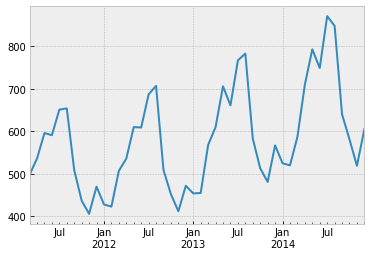

In [106]:
mk_ts.Tractor_sales.plot()

# Identifying Series Components(series decomposition)

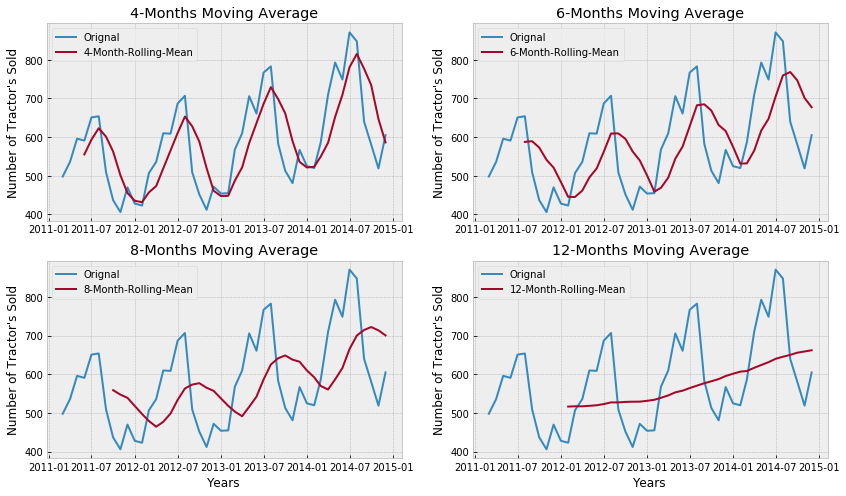

In [107]:
# 1.Trends
fig,axes= plt.subplots(2,2,sharex=False,sharey=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(mk_ts.Tractor_sales.index,mk_ts.Tractor_sales,label='Orignal')
axes[0][0].plot(mk_ts.Tractor_sales.index,mk_ts.Tractor_sales.rolling(window=4).mean(),label='4-Month-Rolling-Mean')
axes[0][0].set_xlabel("")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(mk_ts.Tractor_sales.index,mk_ts.Tractor_sales,label='Orignal')
axes[0][1].plot(mk_ts.Tractor_sales.index,mk_ts.Tractor_sales.rolling(window=6).mean(),label='6-Month-Rolling-Mean')
axes[0][1].set_xlabel("")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(mk_ts.Tractor_sales.index,mk_ts.Tractor_sales,label='Orignal')
axes[1][0].plot(mk_ts.Tractor_sales.index,mk_ts.Tractor_sales.rolling(window=8).mean(),label='8-Month-Rolling-Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(mk_ts.Tractor_sales.index,mk_ts.Tractor_sales,label='Orignal')
axes[1][1].plot(mk_ts.Tractor_sales.index,mk_ts.Tractor_sales.rolling(window=12).mean(),label='12-Month-Rolling-Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

In [108]:
mk_data.head()

,Tractor_Sales,Marketing_Expense,month,year
2011-01-01,397,486.64,Jan,2011
2011-02-01,400,501.80,Feb,2011
2011-03-01,498,437.09,Mar,2011
2011-04-01,536,565.16,Apr,2011
2011-05-01,596,744.15,May,2011


In [109]:
#2. Seasonality
monthly_sales =pd.pivot_table(mk_data,columns='year',index='month',values='Tractor_Sales').reindex(index=['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales

year,2011,2012,2013,2014
month,,,,
Jan,397,428,454,525
Feb,400,423,455,520
Mar,498,507,568,587
Apr,536,536,610,710
May,596,610,706,793
Jun,591,609,661,749
Jul,651,687,767,871
Aug,654,707,783,848
Sep,509,509,583,640


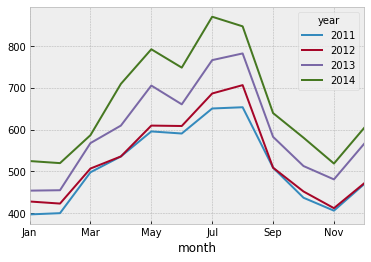

In [111]:
monthly_sales.plot()
plt.show()
# seasoanl cycle of 12 months can be observed

In [112]:
# 3. Residuals
decomposition = sm.tsa.seasonal_decompose(sales_ts,model='multiplicative') 

In [113]:
decomposition.resid

2003-01-01         NaN
2003-02-01         NaN
2003-03-01         NaN
2003-04-01         NaN
2003-05-01         NaN
2003-06-01         NaN
2003-07-01    0.950648
2003-08-01    0.951822
2003-09-01    1.000064
2003-10-01    1.003991
2003-11-01    1.005438
2003-12-01    1.012668
2004-01-01    0.964784
2004-02-01    1.075410
2004-03-01    1.037367
2004-04-01    1.015796
2004-05-01    0.928017
2004-06-01    0.967551
2004-07-01    0.984506
2004-08-01    0.974684
2004-09-01    1.024101
2004-10-01    0.975238
2004-11-01    0.940831
2004-12-01    1.004759
2005-01-01    1.013184
2005-02-01    1.063802
2005-03-01    1.088910
2005-04-01    1.015465
2005-05-01    1.050512
2005-06-01    0.944274
                ...   
2012-07-01    1.047883
2012-08-01    1.078637
2012-09-01    0.985872
2012-10-01    0.996444
2012-11-01    0.979561
2012-12-01    0.940703
2013-01-01    0.982772
2013-02-01    0.949974
2013-03-01    0.977740
2013-04-01    0.974227
2013-05-01    1.017965
2013-06-01    0.996603
2013-07-01 

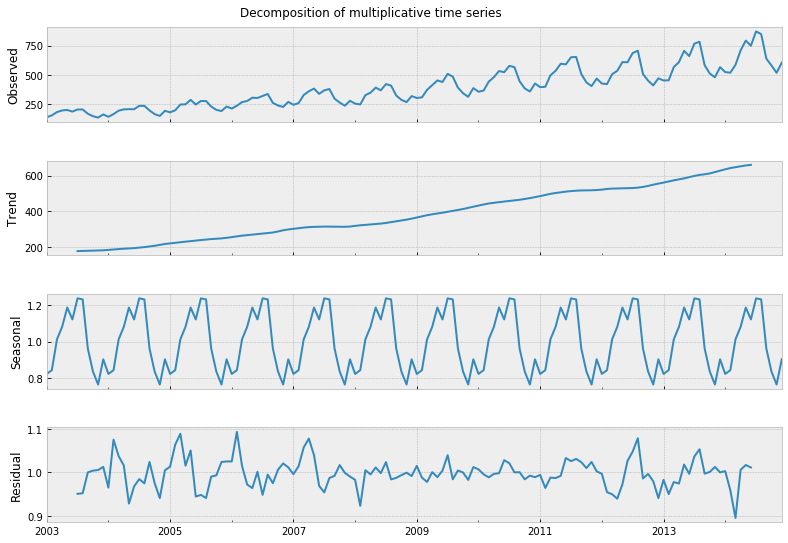

In [114]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [115]:
#now use dicky-fuller test to check whether time series is stationary 
from statsmodels.tsa.stattools import adfuller
dft_res = adfuller(mk_ts.Tractor_sales)
for key,value in dft_res[4].items():
    print('Critical Value',key,'is',value)
result= pd.Series(dft_res[0:4],index=['Test Statistic', 'p-value', 'lags Used', 'Number of Observations Used'])
print(result)

Critical Value 1% is -3.6327426647230316
Critical Value 5% is -2.9485102040816327
Critical Value 10% is -2.6130173469387756
Test Statistic                  1.472501
p-value                         0.997420
lags Used                      10.000000
Number of Observations Used    35.000000
dtype: float64


In [ ]:
# p value > 0.05, fails to reject null hypothesis, so time series is not stationary

# Making Time Series Stationary

In [ ]:
# Applying log tranformation for constant variance and differencing for constant mean(detrending)

In [116]:
mk_ts_diff1 = np.log(mk_ts.Tractor_sales).diff(periods=1)
mk_ts_diff1.dropna(inplace=True)

In [117]:
#now use dicky-fuller test to check whether time series becomes stationary 
from statsmodels.tsa.stattools import adfuller
dft_res = adfuller(mk_ts_diff1)
for key,value in dft_res[4].items():
    print('Critical Value',key,'is',value)
result= pd.Series(dft_res[0:4],index=['Test Statistic', 'p-value', 'lags Used', 'Number of Observations Used'])
print(result)

Critical Value 1% is -3.639224104416853
Critical Value 5% is -2.9512301791166293
Critical Value 10% is -2.614446989619377
Test Statistic                 -5.577763
p-value                         0.000001
lags Used                      10.000000
Number of Observations Used    34.000000
dtype: float64


In [ ]:
# p-value < 0.05, hence stationary

# Building Forecasting Model and Identifying best SARIMAX parameters

In [118]:
# Now split the ts into train and test ts for further validation of our model
test_mk_ts = mk_ts[-3:]
train_mk_ts = mk_ts[:-3]

In [120]:
train_mk_ts.head()

,Tractor_sales,Marketing_spend,Lag_1_ms,Lag_2_ms
2011-03-01,498,437.09,501.80,486.64
2011-04-01,536,565.16,437.09,501.80
2011-05-01,596,744.15,565.16,437.09
2011-06-01,591,548.74,744.15,565.16
2011-07-01,651,650.21,548.74,744.15


In [121]:
test_mk_ts

,Tractor_sales,Marketing_spend,Lag_1_ms,Lag_2_ms
2014-10-01,581,570.30,718.98,784.62
2014-11-01,519,527.60,570.30,718.98
2014-12-01,605,559.75,527.60,570.30


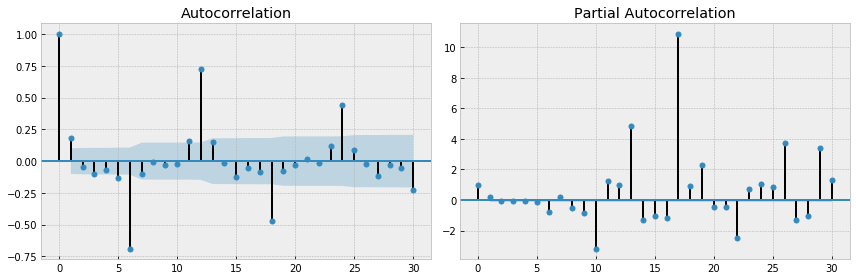

In [119]:
fig,axes = plt.subplots(1,2,sharex=False,sharey=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(mk_ts_diff1,lags=30,ax=axes[0],alpha=0.5)
smt.graphics.plot_pacf(mk_ts_diff1,lags=30,ax=axes[1],alpha=0.5)
plt.tight_layout()

In [122]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [123]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [124]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [125]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            temp_model = sm.tsa.statespace.SARIMAX(endog=train_mk_ts.Tractor_sales,exog=train_mk_ts[['Marketing_spend','Lag_1_ms','Lag_2_ms']],order=param,seasonal_order=seasonal_param,
                               enforce_invertibility=True,enforce_stationarity=True)
            result = temp_model.fit()
            if result.aic < best_aic:
                best_aic = result.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
            
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
            
print('Best SARIMAX{}X{} model with AIC:{}'.format(best_pdq,best_seasonal_pdq,best_aic))

Best SARIMAX(0, 2, 2)X(0, 2, 0, 12) model with AIC:175.5452876266267


# Building Best SARIMA Model

In [126]:
best_model_multi = sm.tsa.statespace.SARIMAX(endog=train_mk_ts.Tractor_sales,exog=train_mk_ts[['Marketing_spend','Lag_1_ms','Lag_2_ms']],order=(0,2,2),seasonal_order=(0,2,0,12),
                               enforce_invertibility=True,enforce_stationarity=True).fit()
best_model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                      Tractor_sales   No. Observations:                   43
Model:             SARIMAX(0, 2, 2)x(0, 2, 0, 12)   Log Likelihood                 -81.773
Date:                            Wed, 23 Oct 2019   AIC                            175.545
Time:                                    02:59:05   BIC                            180.545
Sample:                                03-01-2011   HQIC                           176.042
                                     - 09-01-2014                                         
Covariance Type:                              opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Marketing_spend     0.0153      0.063      0.244      0.807      -0.108       0.138
Lag_1_ms           -0.0229      0.040     -0.574      0.566      -0.101       0.055
Lag_2_ms           -0.0662      0.023     -2.841      0.004      -0.112      -0.021
ma.L1              -1.9896      0.503     -3.954      0.000      -2.976      -1.003
ma.L2               0.9902      0.618      1.602      0.109      -0.221       2.202
sigma2            516.7497      0.002   2.41e+05      0.000     516.745     516.754
===================================================================================
Ljung-Box (Q):                       13.17   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.66   Prob(JB):                         0.51
Heteroskedasticity (H):               0.49   Skew:                            -0.67
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.66e+22. Standard errors may be unstable.
"""

In [127]:
best_model_multi.forecast(3,exog = test_mk_ts[['Marketing_spend','Lag_1_ms','Lag_2_ms']])

2014-10-01    569.991460
2014-11-01    542.239327
2014-12-01    636.051755
Freq: MS, dtype: float64

In [128]:
pred_train = best_model_multi.predict()
actual_train = train_mk_ts.Tractor_sales
pred_test = best_model_multi.forecast(3,exog = test_mk_ts[['Marketing_spend','Lag_1_ms','Lag_2_ms']])
actual_test = test_mk_ts.Tractor_sales

# Validating the SARIMAX model by calculating metrics

In [129]:
#MSE
print(metrics.mean_squared_error(actual_train,pred_train))
print(metrics.mean_squared_error(actual_test,pred_test))

14720.338186312687
541.8219364796626


In [130]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(actual_train,pred_train)))
print(np.sqrt(metrics.mean_squared_error(actual_test,pred_test)))

121.32740080588839
23.27706889794466


In [131]:
# Validating the SARIMAX model by calculating MSE,RMSE,MAPE,MAE
#MAE
from sklearn import metrics
print(metrics.mean_absolute_error(actual_train,pred_train))
print(metrics.mean_absolute_error(actual_test,pred_test))

65.7989264767986
21.766541027059855


In [132]:
#MAPE
print(sum(abs((actual_train-pred_train)/actual_train))/len(actual_train))
print(sum(abs((actual_test-pred_test)/actual_test))/len(actual_test))

0.12413155090837218
0.038349971078900556


# Visualizing actual and predicted values

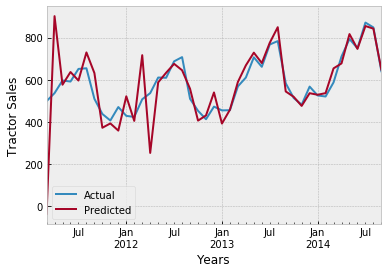

In [134]:
actual_train.plot(label ='Actual')
pred_train.plot(label ='Predicted')
plt.xlabel('Years')
plt.ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
# Train data

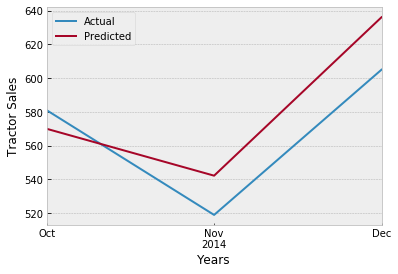

In [135]:
actual_test.plot(label ='Actual')
pred_test.plot(label ='Predicted')
plt.xlabel('Years')
plt.ylabel('Tractor Sales')
plt.legend(loc='best')
# Test data

# Residuals analysis 

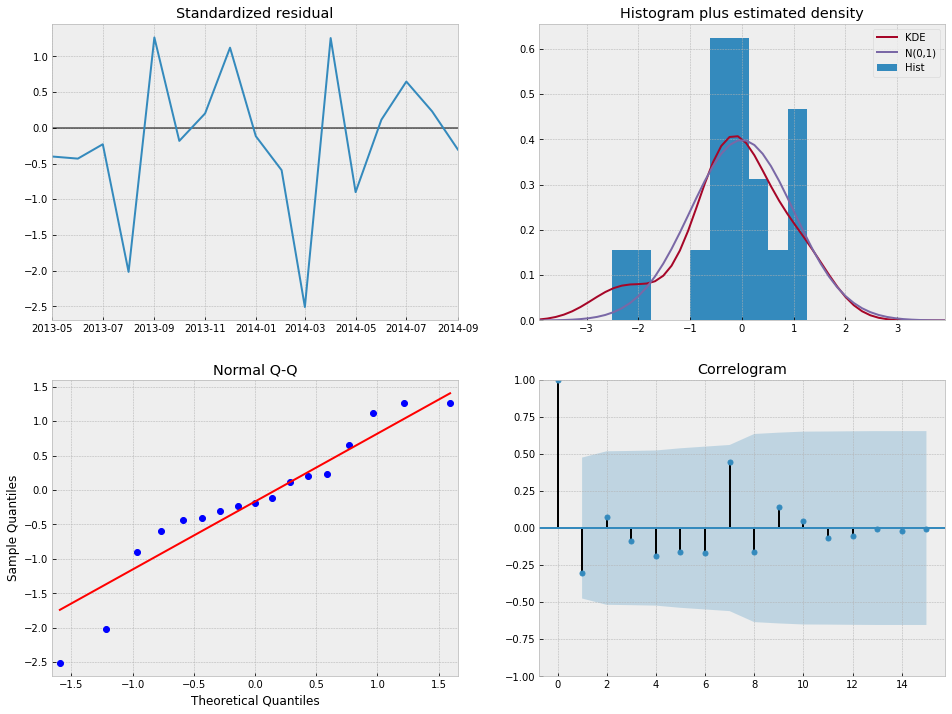

In [136]:
best_model_multi.plot_diagnostics(lags=15,figsize=(16,12))
plt.show()

In [137]:
# by observing above metrics, visualizations and residual analysis
# we can say that our model is good fit 